In [4]:
import pandas as pd 
import numpy as np 
import time 
import sklearn
import editdistance
import heapq

In [20]:
import numpy as np 
import os 
import time 
import cv2 
import matplotlib.pyplot as plt 
import pandas as pd

def merge_data(path_folder):
    l_csv = []
    for csv in os.listdir(path_folder):
        path_csv = path_folder + "/" + csv 
        print(path_csv)
        csv_file = pd.read_csv(path_csv, sep='\t', encoding='utf-8')
        l_csv.append(csv_file)
    merge_csv = l_csv[0]
    for i in range(1, len(l_csv)):
        merge_csv = merge_csv.append(l_csv[i])
    return merge_csv

def extract_group_prob(csv_file):
    product_count = {}
    for index, row in csv_file.iterrows():
        groupproduct = row["productset_group_name"]
        if groupproduct not in product_count:
            product_count[groupproduct] = 1
        else:
            product_count[groupproduct] += 1
    total_product = 0
    for key in product_count.keys():
        total_product += product_count[key]
    product_prob = {}
    for key in product_count.keys():
        product_prob[key] = product_count[key] / total_product
    return product_count

if __name__ == '__main__':
    path_folder = "Clean_Data"
    merge_csv = merge_data(path_folder)
    
    product_count = extract_group_prob(merge_csv)
    print(product_count)
    

Clean_Data/.~lock.nhacua.csv#
Clean_Data/thucpham.csv
Clean_Data/laptop.csv
Clean_Data/sach.csv
Clean_Data/nhacua.csv
Clean_Data/concat_dataset.csv
Clean_Data/dienthoai.csv
{'Bách Hóa Online': 9996, 'Laptop - Máy Vi Tính - Linh kiện': 441, 'Nhà Sách Tiki': 16302, 'Đồ Chơi - Mẹ & Bé': 1478, 'Thiết Bị Số - Phụ Kiện Số': 21901, 'Làm Đẹp - Sức Khỏe': 78, 'Nhà Cửa - Đời Sống': 870, 'Ô Tô - Xe Máy - Xe Đạp': 236, 'Điện Tử - Điện Lạnh': 244, 'Thể Thao - Dã Ngoại': 45, 'Giày - Dép nam': 1, 'Hàng Quốc Tế': 2397, 'Đồng hồ và Trang sức': 143, 'Giày - Dép nữ': 26, 'Balo và Vali': 68, 'Túi thời trang nam': 10, 'Phụ kiện thời trang': 38, 'Thời trang nữ': 111, 'Máy Ảnh - Máy Quay Phim': 14, 'Voucher - Dịch vụ': 30, 'Điện Gia Dụng': 4, 'Thời trang nam': 130, 'Thực Phẩm Tươi Sống': 2, 'Túi thời trang nữ': 16, 'Điện Thoại - Máy Tính Bảng': 220}


In [1]:
def convert_data(data):
    l_convert_data = []
    reviewcount_groupproductset = {}
    reviewaverage_groupproductset = {}
    group_product_count = {}
    for index, row in data.iterrows():
        review_average  = row["rating_average"]
        review_count = row["review_count"]
        type_product = row["productset_group_name"]
        if review_count <= 10:
            value_review = random.randint(11,20000)
            value_rating = random.uniform(1.5,4.7)
            row["rating_average"] = value_rating
            row["review_count"] = value_review
            l_convert_data.append(row)
    datacv = pd.DataFrame(l_convert_data)
    return datacv


def extract_review(data):
    l_convert_data = []
    reviewcount_groupproductset = {}
    reviewaverage_groupproductset = {}
    group_product_count = {}
    for index, row in data.iterrows():
        review_average  = row["rating_average"]
        review_count = row["review_count"]
        type_product = row["productset_group_name"]
        if  type_product not in reviewcount_groupproductset:
            reviewcount_groupproductset[type_product] = review_count
            reviewaverage_groupproductset[type_product] = review_average
            group_product_count[type_product] = 1
        else:
            reviewcount_groupproductset[type_product] += review_count
            reviewaverage_groupproductset[type_product] += review_average
            group_product_count[type_product] += 1
    for key in reviewcount_groupproductset.keys():
        reviewcount_groupproductset[key] = reviewcount_groupproductset[key] / group_product_count[key]
        reviewaverage_groupproductset[key] = reviewaverage_groupproductset[key] / group_product_count[key]
    return reviewaverage_groupproductset, reviewcount_groupproductset


In [6]:
reviewaverage_groupproductset, reviewcount_groupproductset = extract_review(merge_csv)


In [7]:
print(reviewaverage_groupproductset, reviewcount_groupproductset)

{'Bách Hóa Online': 3.018984390951774, 'Laptop - Máy Vi Tính - Linh kiện': 2.600181606725901, 'Nhà Sách Tiki': 2.430258082736608, 'Đồ Chơi - Mẹ & Bé': 2.5679830934239827, 'Thiết Bị Số - Phụ Kiện Số': 1.9517460036474064, 'Làm Đẹp - Sức Khỏe': 2.582435190111865, 'Nhà Cửa - Đời Sống': 2.539340729648425, 'Ô Tô - Xe Máy - Xe Đạp': 2.5627569301820494, 'Điện Tử - Điện Lạnh': 2.613516193865918, 'Thể Thao - Dã Ngoại': 3.0404192579079834, 'Giày - Dép nam': 4.5, 'Hàng Quốc Tế': 2.0570780372133237, 'Đồng hồ và Trang sức': 2.196001654541646, 'Giày - Dép nữ': 2.4058249127179545, 'Balo và Vali': 2.3661957594854734, 'Túi thời trang nam': 2.266581315205906, 'Phụ kiện thời trang': 2.703378619601635, 'Thời trang nữ': 2.3008340734617923, 'Máy Ảnh - Máy Quay Phim': 2.7831274124245047, 'Voucher - Dịch vụ': 1.875609133822312, 'Điện Gia Dụng': 2.4352866167523017, 'Thời trang nam': 1.8126697611319718, 'Thực Phẩm Tươi Sống': 4.10599687186056, 'Túi thời trang nữ': 1.8408647893702044, 'Điện Thoại - Máy Tính Bảng'

In [26]:
name = ['Bách Hóa Online', 'Laptop - Máy Vi Tính - Linh kiện', 'Nhà Sách Tiki', 'Đồ Chơi - Mẹ & Bé', 'Thiết Bị Số - Phụ Kiện Số', 'Nhà Cửa - Đời Sống', 'Điện Tử - Điện Lạnh', 'Thể Thao - Dã Ngoại', 'Ô Tô - Xe Máy - Xe Đạp', 'Làm Đẹp - Sức Khỏe', 'Hàng Quốc Tế', 'Đồng hồ và Trang sức', 'Balo và Vali', 'Túi thời trang nam', 'Phụ kiện thời trang', 'Giày - Dép nữ', 'Máy Ảnh - Máy Quay Phim', 'Thời trang nữ', 'Voucher - Dịch vụ', 'Điện Gia Dụng', 'Thời trang nam', 'Thực Phẩm Tươi Sống', 'Túi thời trang nữ', 'Điện Thoại - Máy Tính Bảng']
price = [2.42, 2.73, 2.51, 2.24, 2.36, 2.78, 2.85, 2.91, 2.62, 2.29, 2.73, 2.48, 2.34, 2.58, 2.82, 2.71, 2.78, 2.63, 2.60, 2.29, 2.71, 2.49, 2.83, 2.44]
cv_price = [i + 1 for i in price]
print(price)

TypeError: 'int' object is not iterable

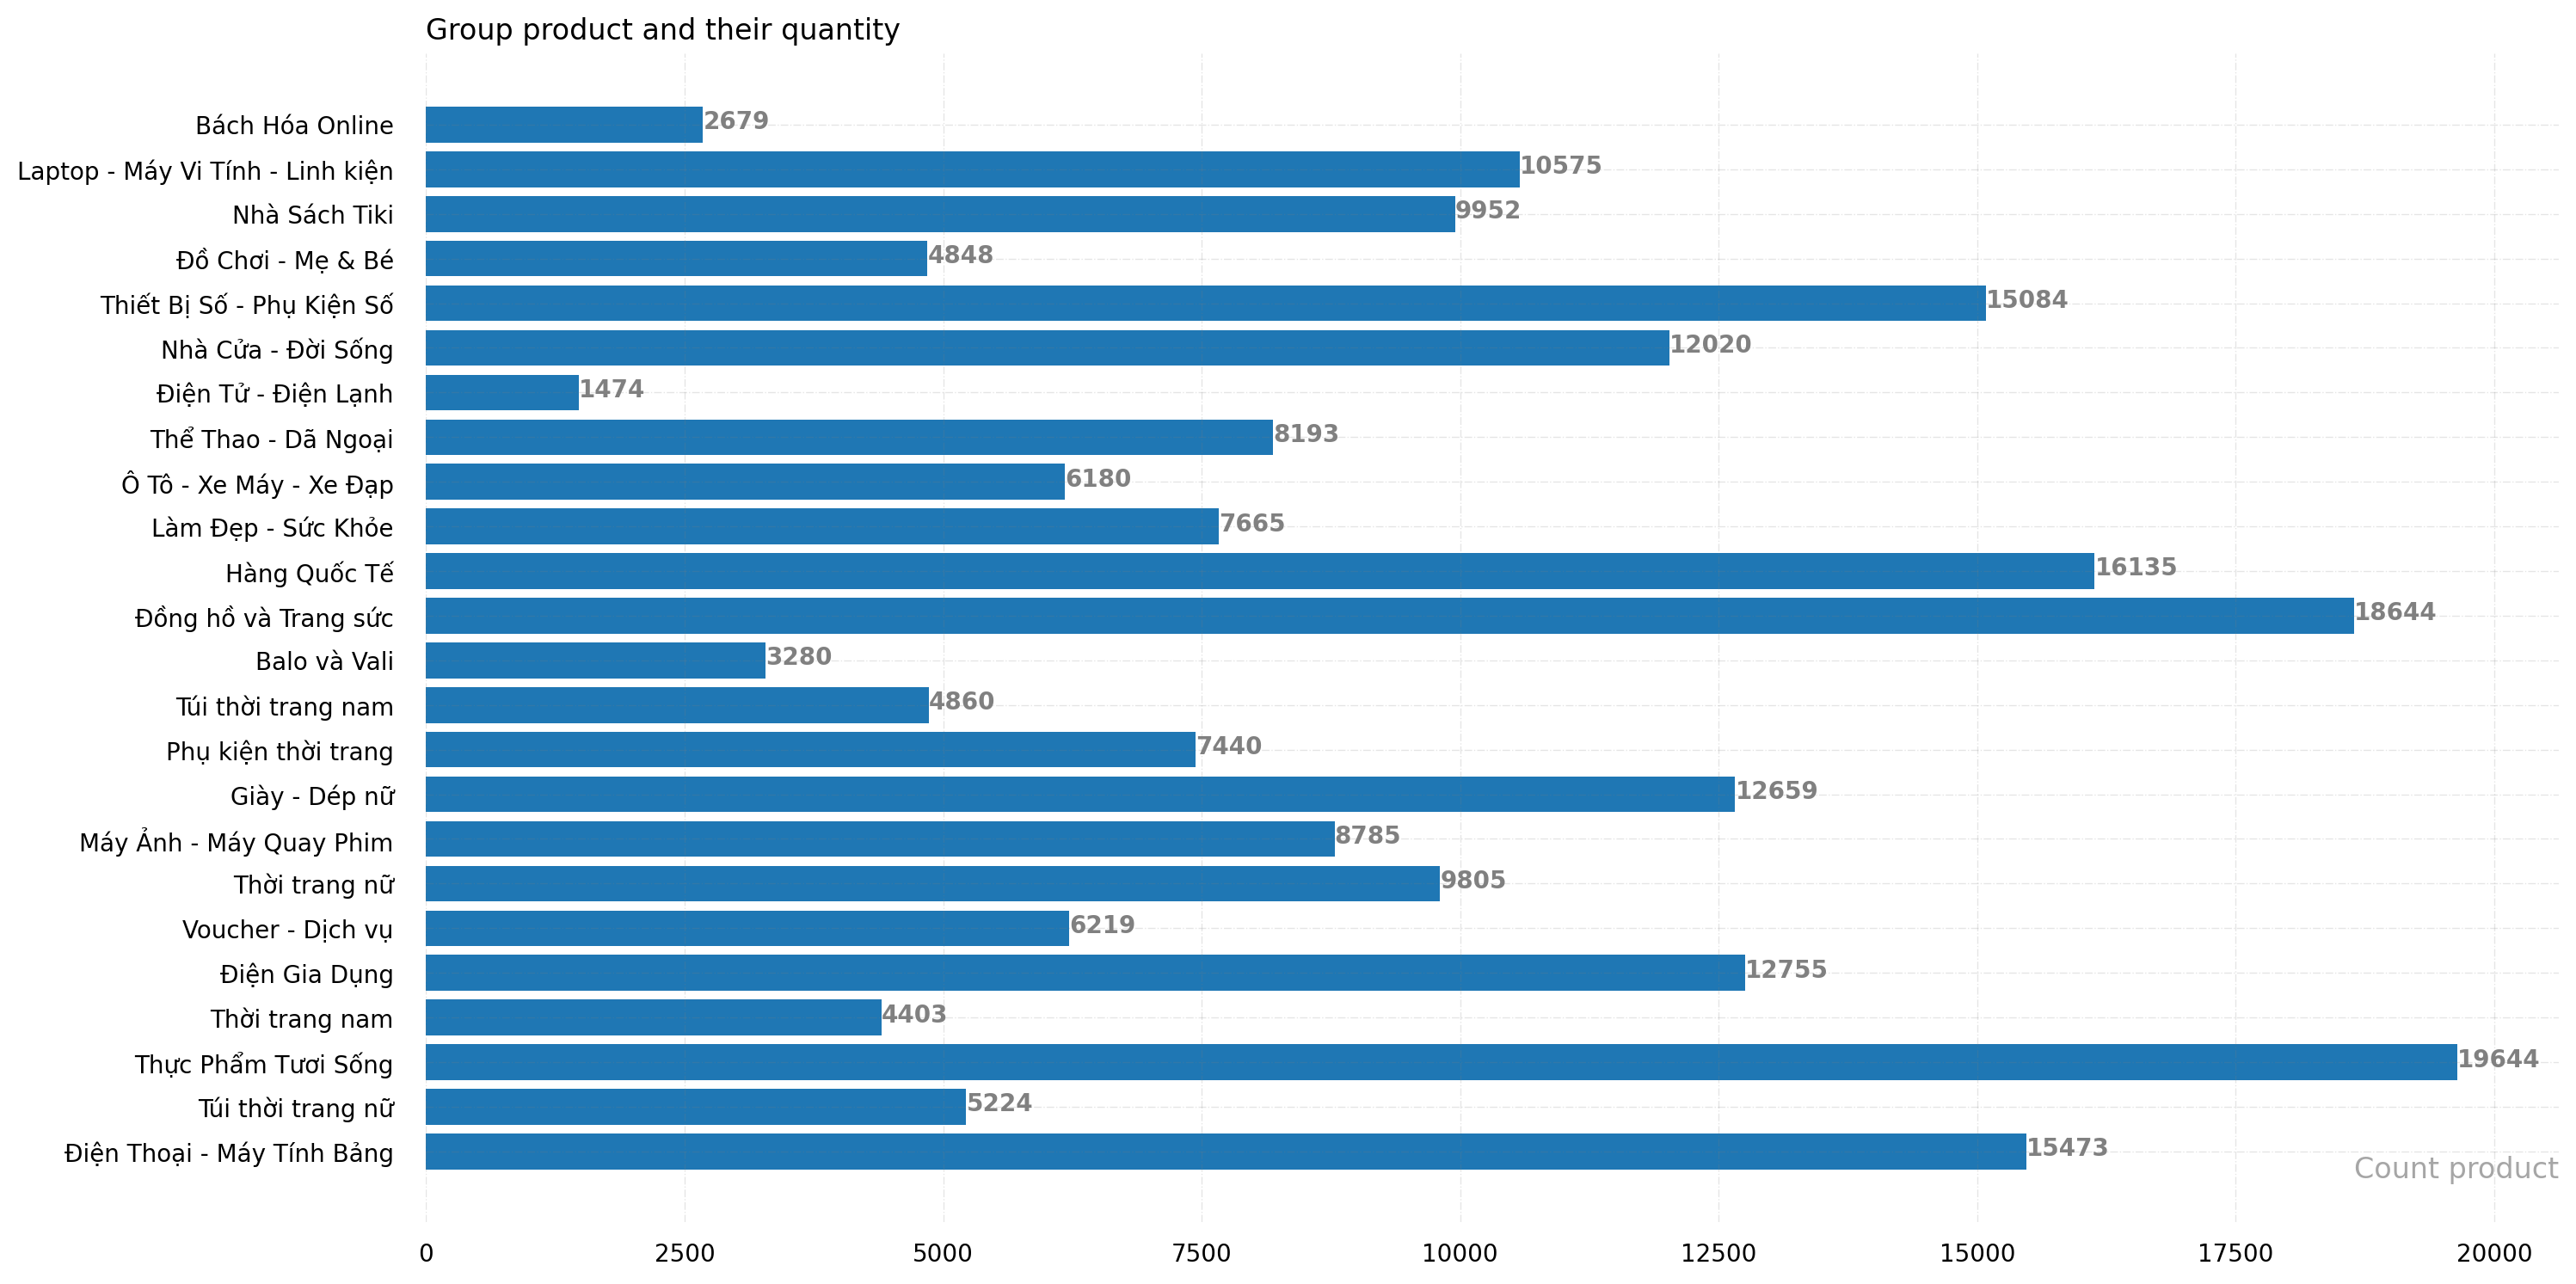

In [25]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 200)
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Group product and their average review point',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Average point', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy

figure, axis = plt.subplots()



y_pos = numpy.arange(len(hang))

plt.bar(y_pos, count_daban)
plt.xticks(y_pos, hang)

axis.set_ylim(0,200)

plt.ylabel('Số máy ') 
plt.title('Số lượng máy đã bán theo hãng trên tiki')

rects = axis.patches

for rect,labe1 in zip(rects, count_daban):
	height = rect.get_height()
	axis.text(rect.get_x() + rect.get_width() / 2, height + 0, labe1, ha='center', va='bottom')
	

plt.show()

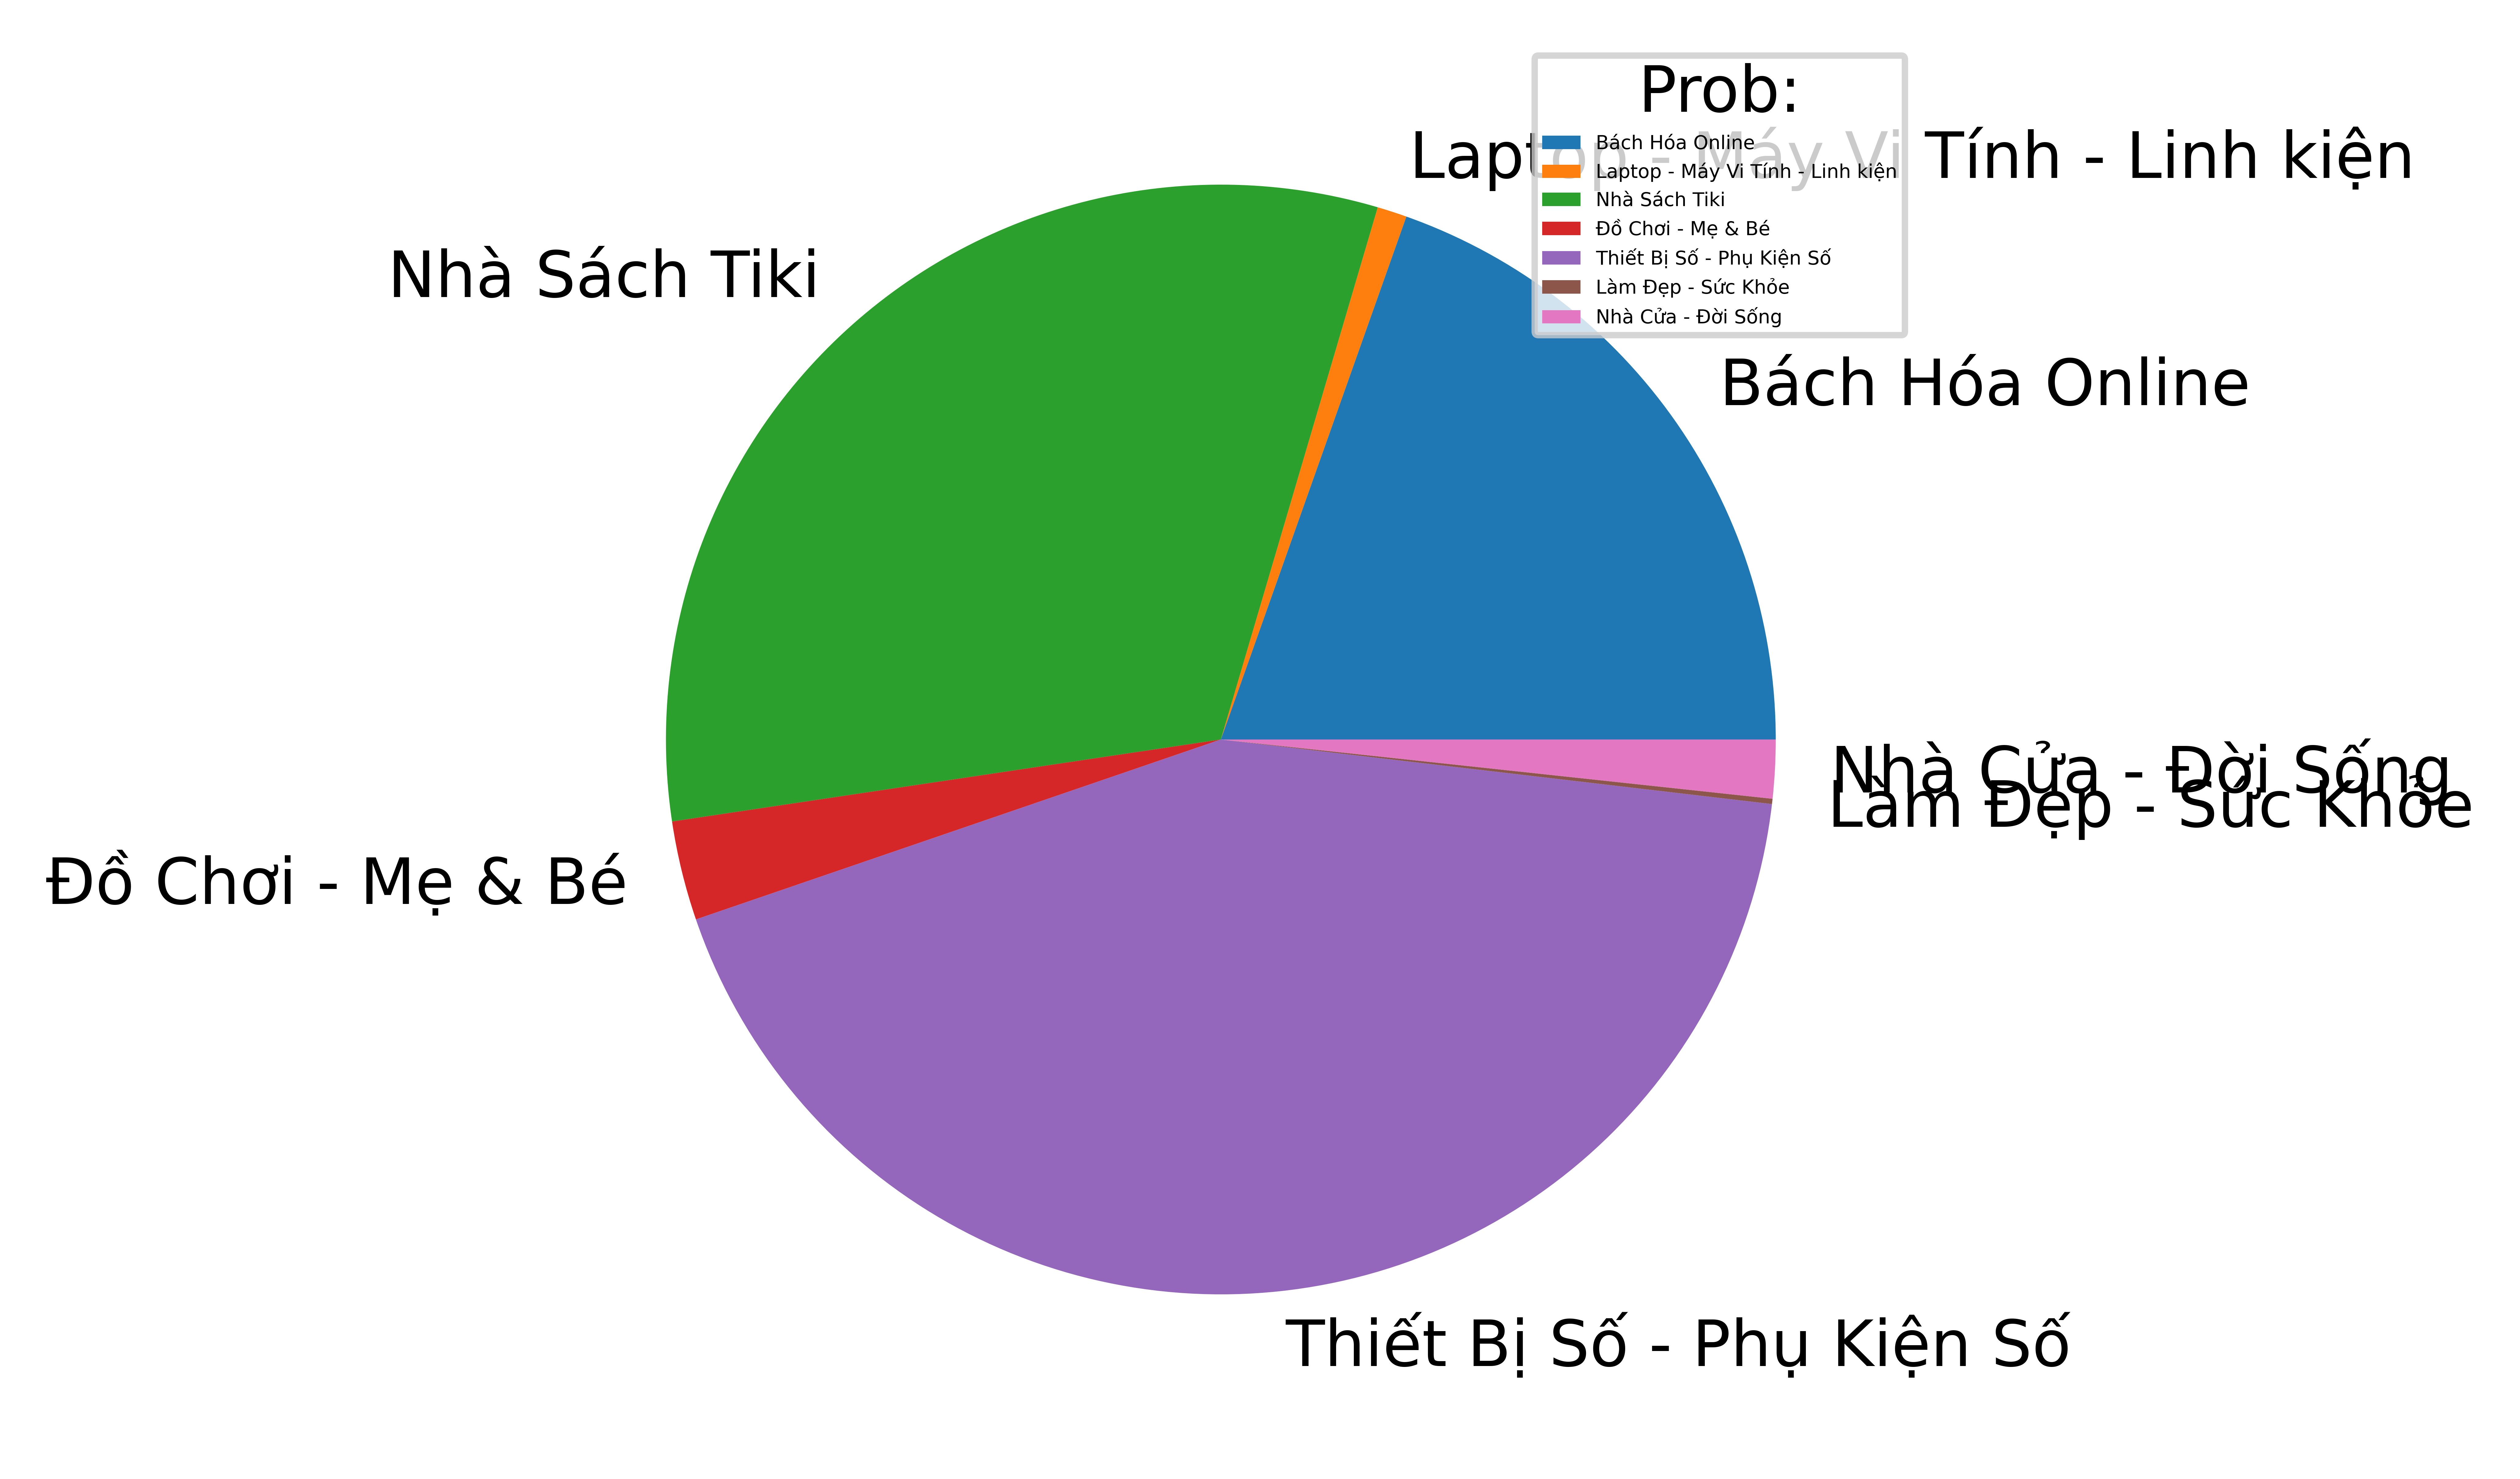

In [7]:
import matplotlib.pyplot as plt
import numpy as np


y = []
mylabels = []
count = 0
for key in product_count.keys():
    count += 1
    if count >= 8: break
    value_prob = product_count[key]
    y.append(value_prob)
    mylabels.append(key)
y = np.array(y)

plt.figure(dpi=1500)
plt.pie(y, labels = mylabels)
plt.legend(title = "Prob:", loc = "upper right", fontsize = 3)
plt.show()

In [ ]:
#Barchar review and sales


In [2]:
csv_dienthoai = pd.read_csv("/home/haiduong/Documents/Project_2/Data/data_laptop/product.csv"\
                            ,error_bad_lines=False)

b'Skipping line 4: expected 58 fields, saw 59\n'


In [3]:
csv_dienthoai["badges"]

0      [{"code": "installment", "price": 2149166, "mo...
1      [{"code": "installment", "price": 1249166, "mo...
2      [{"code": "installment", "price": 953250, "mon...
3      [{"code": "installment", "price": 2999166, "mo...
4      [{"code": "installment", "price": 1481583, "mo...
                             ...                        
216    [{"code": "installment", "price": 4575000, "mo...
217    [{"code": "installment", "price": 3325000, "mo...
218    [{"code": "installment", "price": 3991666, "mo...
219    [{"code": "installment", "price": 4408333, "mo...
220    [{"code": "installment", "price": 2908333, "mo...
Name: badges, Length: 221, dtype: object

In [7]:
'''
Log used feature
Fill nan
Drop error value 
'''
'''
id : id sản phẩm 
name: tên sản phẩm 
url_key: url 
url_path
type: configurable, simple 
short description: miêu tả ngắn gọn 
price: giá hiện tại
list_price: giá chào hàng
discount: giảm giá 
discount_rate: tỉ lệ giảm 
rating_average: 
review_count: 
order_count: 
thumbnail_url: path đến ảnh thumbnail 
product_group_name: Ngành hàng 
categories
'''


'\nid : id sản phẩm \nname: tên sản phẩm \nurl_key: url \nurl_path\ntype: configurable, simple \nshort description: miêu tả ngắn gọn \nprice: giá hiện tại\nlist_price: giá chào hàng\ndiscount: giảm giá \ndiscount_rate: tỉ lệ giảm \nrating_average: \nreview_count: \norder_count: \nthumbnail_url: path đến ảnh thumbnail \nproduct_group_name: Ngành hàng \ncategories\n'

In [4]:
Data_clean = csv_dienthoai[['id', 'name', 'url_key', 'url_path', 'type', 'short_description',\
                           'price', 'list_price', 'discount', 'discount_rate', 'rating_average',\
                           'review_count', 'order_count', 'thumbnail_url', 'productset_group_name',\
                           'categories']]
Data_clean

,id,name,url_key,url_path,type,short_description,price,list_price,discount,discount_rate,rating_average,review_count,order_count,thumbnail_url,productset_group_name,categories
0,73795621,Apple Macbook Air 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,configurable,Hiệu năng mạnh mẽ\nMacBook Air mới sử dụng chi...,25790000,29990000,4200000,14,5.0,7,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
1,74556865,Laptop Huawei Matebook D 15 (8GB/256GB) - Hàng...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,configurable,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n*Hình ảnh ...,14990000,14990000,0,0,4.8,29,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
2,72761522,LapTop Lenovo ThinkBook 15 IIL 20SM00D9VN | Co...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,simple,Thông Số Kỹ ThuậtCPU 10th Generation Intel Cor...,11439000,13890000,2451000,18,4.8,13,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
3,73795660,Apple Macbook Pro 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,configurable,"Thiết kế trau chuốt từng đường nét, trải nghiệ...",35990000,39990000,4000000,10,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
4,73177245,Laptop MSI Bravo 15 A4DCR-270VN (AMD Ryzen 5 4...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,simple,"Thiết kế vỏ nhôm xước mỏng và nhẹ, mang tính t...",17779000,19490000,1711000,9,5.0,5,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,92621126,Laptop LG Gram 2021 17Z90P-G.AH78A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,54900000,54900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
217,92610138,Laptop LG Gram 2021 16ZD90P-G.AX54A5 (Core i7-...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,simple,Mỏng nhẹ hơn bao giờ hết\nLaptop LG Gram 2021 ...,39900000,39900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
218,92613018,Laptop LG Gram 2021 14Z90P-G.AH75A5 (Core i7-1...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,simple,"Siêu mỏng nhẹ, bền bỉ\nHướng đến sự tiện lợi k...",47900000,47900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
219,92621088,Laptop LG Gram 2021 17Z90P-G.AH76A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,52900000,52900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."


In [6]:
'''
Hướng phân tích 
'''
'''
tìm kiếm theo tên sản phẩm + sort sản phẩm theo sao, theo số lượng mua 

phân tích theo tỉ lệ ngành hàng
phân tích theo tỉ lệ giảm giá 
phân tích mối liên hệ giữa giá và tỉ lệ discount độ tương quan 
phân tích mối liên hệ giữa mặt hàng quốc tế và trong nước 
Thống kê số lượng sell theo từng ngành hàng, tỉ lệ review theo ngành hàng 
Phân cụm theo như cầu

'''

'\ntìm kiếm theo tên sản phẩm + sort sản phẩm theo sao, theo số lượng mua \nphân tích theo tỉ lệ ngành hàng\nphân tích theo tỉ lệ giảm giá \nphân tích mối liên hệ giữa giá và tỉ lệ discount độ tương quan \nphân tích mối liên hệ giữa mặt hàng quốc tế và trong nước \nThống kê số lượng sell theo từng ngành hàng, tỉ lệ review theo ngành hàng \nPhân cụm theo như cầu\n\n\n\n\n'

In [10]:
#use case 1:
#Tìm kiếm theo tên sản phẩm 
name_column = Data_clean["name"]
for index, row in name_column.iteritems():
    #print(row)
    name_clean = row.split(" - ")[0]
    print(name_clean)
    Data_clean.iloc[index]["name"] = name_clean

Apple Macbook Air 2020 M1
Laptop Huawei Matebook D 15 (8GB/256GB)
LapTop Lenovo ThinkBook 15 IIL 20SM00D9VN | Core i3 _ 1005G1 | 4GB | 512GB SSD PCIe | Win 10 | 15,6'' FHD IPS | Hàng Chính Hãng
Apple Macbook Pro 2020 M1
Laptop MSI Bravo 15 A4DCR-270VN (AMD Ryzen 5 4600H/ 8GB DDR4 3200MHz/ 256GB SSD M.2 PCIE/ AMD RX 5300M 3GB GDDR6/ 15.6 FHD IPS, 144Hz/ Win10)
Máy Tính Xách Tay Laptop HUAWEI MateBook D14 AMD (R7 | 8GB/512GB) | Màn Hình HUAWEI Fullview 14-Inch | Card Đồ Họa RX Vega 10 Radeon | Phím Nguồn Kết Hợp Bảo Mật Vân Tay | Hàng Phân Phối Chính Hãng
Laptop HP Envy 13-ba1027TU 2K0B1PA (Core i5-1135G7/ 8GB DDR4 3200MHz (Onboard)/ 256GB PCIe NVMe M.2/ 13.3 FHD IPS/ Win10)
Laptop HP Pavilion 15-eg0003TX 2D9C5PA (Core i5-1135G7/ 4GB (4GBx1) DDR4 3200MHz/ 256GB PCIe NVMe/ MX450 2GB GDDR5/ 15.6 FHD IPS/ Win10 + Office)
Laptop HP Pavilion x360 14-dw1016TU 2H3Q0PA (Core i3-1115G4/ 4GB DDR4 3200MHz/ 256 GB PCIe NVMe M.2 SSD/ 14 FHD IPS Touch/ Win10 + Office)
Laptop Asus Vivobook X415MA-BV088

<ipython-input-10-ac156bc8ebf5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_clean.iloc[index]["name"] = name_clean


In [5]:
Data_clean

,id,name,url_key,url_path,type,short_description,price,list_price,discount,discount_rate,rating_average,review_count,order_count,thumbnail_url,productset_group_name,categories
0,73795621,Apple Macbook Air 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,configurable,Hiệu năng mạnh mẽ\nMacBook Air mới sử dụng chi...,25790000,29990000,4200000,14,5.0,7,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
1,74556865,Laptop Huawei Matebook D 15 (8GB/256GB) - Hàng...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,configurable,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n*Hình ảnh ...,14990000,14990000,0,0,4.8,29,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
2,72761522,LapTop Lenovo ThinkBook 15 IIL 20SM00D9VN | Co...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,simple,Thông Số Kỹ ThuậtCPU 10th Generation Intel Cor...,11439000,13890000,2451000,18,4.8,13,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
3,73795660,Apple Macbook Pro 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,configurable,"Thiết kế trau chuốt từng đường nét, trải nghiệ...",35990000,39990000,4000000,10,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
4,73177245,Laptop MSI Bravo 15 A4DCR-270VN (AMD Ryzen 5 4...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,simple,"Thiết kế vỏ nhôm xước mỏng và nhẹ, mang tính t...",17779000,19490000,1711000,9,5.0,5,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,92621126,Laptop LG Gram 2021 17Z90P-G.AH78A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,54900000,54900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
217,92610138,Laptop LG Gram 2021 16ZD90P-G.AX54A5 (Core i7-...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,simple,Mỏng nhẹ hơn bao giờ hết\nLaptop LG Gram 2021 ...,39900000,39900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
218,92613018,Laptop LG Gram 2021 14Z90P-G.AH75A5 (Core i7-1...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,simple,"Siêu mỏng nhẹ, bền bỉ\nHướng đến sự tiện lợi k...",47900000,47900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
219,92621088,Laptop LG Gram 2021 17Z90P-G.AH76A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,52900000,52900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."


In [6]:

def search(keyword, database):
    '''
    get edit distance similarity score and sort
    '''
    l_score = []
    for index, row in database["name"].iteritems():
        score = editdistance.eval(keyword, row)
        l_score.append(score)
    l_score = np.array(l_score)
    top_idx_minscore = (l_score).argsort()[:20]
    #top_n_minscore = heapq.nsmallest(5, l_score)
    print(top_idx_minscore)
    rs_query = []
    for index in top_idx_minscore:
        rs_query.append(database.iloc[index]["name"])
    print(rs_query)
    

In [8]:
editdistance.eval('túi đựng điện thoại', 'Ốp lưng cho điện thoại')

9

In [9]:
keyword = 'điện thoại'
search(keyword, csv_dienthoai)

[370 351 452 410 425 368 372 367 398 470 485 486 494 401 594 507 400 373
 492 396]
['Túi điện thoại ', 'kệ để điện thoại', 'Kẹp Điện Thoại', 'Kẹp Điện Thoại', 'Bao da điện thoại', 'bao da điện thoại', 'Giá đỡ điện thoại', 'Củ sạc điện thoại ', 'Giá đỡ điện thoại ', 'Dây đeo điện thoại', 'Cốc sạc điện thoại', 'Tẩu sạc điện thoại', 'Dây đeo điện thoại', ' Giá đỡ điện thoại', 'túi đựng điện thoại', 'Điện thoại dâu tây', 'Bao Da Điện Thoại', 'Củ sạc điện thoại 1A', 'Kẹp điện thoại - OEM', 'Giá Đỡ Điện Thoại ']


In [8]:
def split_product(product_name):
    type_product = product_name.split("/")[0]
    return type_product

In [9]:
#Usecase 2:
#Phân tích theo tỉ lệ ngành hàng
c_product = {}
product_column = csv_dienthoai["productset_group_name"]
for index, row in product_column.iteritems():
    type_product = split_product(row)
    if type_product not in c_product:
        c_product[type_product] = 1
    else:
        c_product[type_product] += 1


In [10]:
print(c_product)

{'Laptop - Máy Vi Tính - Linh kiện': 221}


In [11]:

#drop noise value
'''
5 nhóm ngành hàng. 5 hàm khử noise và lưu lại vào file csv (convert multi process multi job) 
gọi lên từ hdfs file

lưu lại và tiến hành xử lí.
biểu đồ bar char giữa các nhóm ngành hàng với nhau
tìm kiếm sản phẩm
gộp 5 file clean csv vào 1 ngành hàng để xử lí 

log nganh hang:
csv_dienthoai: Hang quoc te, thiet bi so- phu kien so, dienthoai - may tinh bang
'''
log_groupproduct = ['Hàng Quốc Tế', 'Thiết Bị Số - Phụ Kiện Số', 'Điện Thoại - Máy Tính Bảng',\
                    'Laptop - Máy Vi Tính - Linh kiện']
tmp_data = pd.DataFrame(columns = ['id', 'name', 'url_key', 'url_path', 'type', 'short_description',\
                           'price', 'list_price', 'discount', 'discount_rate', 'rating_average',\
                           'review_count', 'order_count', 'thumbnail_url', 'productset_group_name',\
                           'categories'])

tmp_l = []
for index, row in Data_clean.iterrows():
    type_product = split_product(row["productset_group_name"])
    if type_product not in log_groupproduct:
        print(type_product)
        continue
    else:
        tmp_l.append(row)



In [87]:
tmp_data = pd.DataFrame(tmp_l)
tmp_data

,id,name,url_key,url_path,type,short_description,price,list_price,discount,discount_rate,rating_average,review_count,order_count,thumbnail_url,productset_group_name,categories
0,73795621,Apple Macbook Air 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-air-2020-m1-13-inchs-apple-m1-8g...,configurable,Hiệu năng mạnh mẽ\nMacBook Air mới sử dụng chi...,25790000,29990000,4200000,14,5.0,7,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
1,74556865,Laptop Huawei Matebook D 15 (8GB/256GB) - Hàng...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,laptop-huawei-matebook-d-15-8gb-256gb-hang-pha...,configurable,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n*Hình ảnh ...,14990000,14990000,0,0,4.8,29,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
2,72761522,LapTop Lenovo ThinkBook 15 IIL 20SM00D9VN | Co...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,laptop-lenovo-thinkbook-15-iil-20sm00d9vn-core...,simple,Thông Số Kỹ ThuậtCPU 10th Generation Intel Cor...,11439000,13890000,2451000,18,4.8,13,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
3,73795660,Apple Macbook Pro 2020 M1 - 13 Inchs (Apple M1...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,apple-macbook-pro-2020-m1-13-inchs-apple-m1-8g...,configurable,"Thiết kế trau chuốt từng đường nét, trải nghiệ...",35990000,39990000,4000000,10,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Macbook,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
4,73177245,Laptop MSI Bravo 15 A4DCR-270VN (AMD Ryzen 5 4...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,laptop-msi-bravo-15-a4dcr-270vn-amd-ryzen-5-46...,simple,"Thiết kế vỏ nhôm xước mỏng và nhẹ, mang tính t...",17779000,19490000,1711000,9,5.0,5,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,92621126,Laptop LG Gram 2021 17Z90P-G.AH78A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah78a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,54900000,54900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
217,92610138,Laptop LG Gram 2021 16ZD90P-G.AX54A5 (Core i7-...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,laptop-lg-gram-2021-16zd90p-g-ax54a5-core-i7-1...,simple,Mỏng nhẹ hơn bao giờ hết\nLaptop LG Gram 2021 ...,39900000,39900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
218,92613018,Laptop LG Gram 2021 14Z90P-G.AH75A5 (Core i7-1...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,laptop-lg-gram-2021-14z90p-g-ah75a5-core-i7-11...,simple,"Siêu mỏng nhẹ, bền bỉ\nHướng đến sự tiện lợi k...",47900000,47900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."
219,92621088,Laptop LG Gram 2021 17Z90P-G.AH76A5 (Core i7-1...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,laptop-lg-gram-2021-17z90p-g-ah76a5-core-i7-11...,simple,Thiết kế mỏng nhẹ hơn bao giờ hết\nLaptop LG G...,52900000,52900000,0,0,0.0,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,"{""id"": 29010, ""name"": ""Laptop Truyền Thống"", ""..."


In [ ]:
pd.read_csv("/home/haiduong/Documents/Project_2/Data/data_dienthoai/product.csv"\
                            ,error_bad_lines=False)

In [88]:
def clean_data(number_worker = 2, number_process_per_worker = 2, type_data = "nhacua"):
    data = pd.read_csv("../Data/data_" + str(type_data) + "/product.csv", error_bad_lines = False)
    #drop error row and get specify columns
    data_clean = data[['id', 'name', 'url_key', 'url_path', 'type', 'short_description',\
                           'price', 'list_price', 'discount', 'discount_rate', 'rating_average',\
                           'review_count', 'order_count', 'thumbnail_url', 'productset_group_name',\
                           'categories']]

    #clean name
    name_column = data_clean["name"]
    for index, row in name_column.iteritems():
        name_clean = row.split(" - ")[0]
        data_clean.iloc[index]["name"] = name_clean
    
    #clean product set groupname
    #set with csv laptop
    log_groupproduct = ['Hàng Quốc Tế', 'Thiết Bị Số - Phụ Kiện Số', 'Điện Thoại - Máy Tính Bảng']
    #set with csv nha cua
    #log_groupproduct = []
    
    #set with csv thuc pham 
    log_group_product = ['Bách Hóa Online']
    #set with csv sach
    log_group_product= ['Nhà Sách Tiki']
    #set with csv laptop 
    log_group_product = ['Laptop - Máy Vi Tính - Linh kiện']
    
    tmp_l = []
    for index, row in Data_clean.iterrows():
        type_product = split_product(row["productset_group_name"])
        if type_product not in log_groupproduct:
            print(type_product)
            continue
        else:
            tmp_l.append(row)
    clean_data = pd.DataFrame(tmp_l)
    return clean_data

In [ ]:
#Merge table 


In [52]:
#Usecase 3:
#Phân tích theo tỉ lệ giảm giá
# rating_average: 
# review_count: 
# order_count: 
#So sánh biểu đồ tương quan giữa phần trăm giảm giá và doanh số. => tác động giữa giảm giá và doanh số ?
discount_rate = pd.concat([csv_dienthoai["discount_rate"], csv_dienthoai["rating_average"],\
                           csv_dienthoai["review_count"], csv_dienthoai["order_count"]], axis = 1)

In [53]:
discount_rate


,discount_rate,rating_average,review_count,order_count
0,34,0.0,0,0
1,6,0.0,0,0
2,6,0.0,0,0
3,6,0.0,0,0
4,17,4.5,6,0
...,...,...,...,...
9751,46,0.0,0,0
9752,65,0.0,0,0
9753,61,0.0,0,0
9754,47,0.0,0,0


In [55]:
csv_dienthoai["order_count"] = csv_dienthoai["order_count"].fillna(0)

In [64]:
l_index_order = []
n_review = []
l_rating_average = []
l_discount_rate = []
for index, row in csv_dienthoai.iterrows():
    order_c = row["review_count"]
    rating = row["rating_average"]
    discount_rate = row["discount_rate"]
    if order_c >= 1:
        l_index_order.append(index)
        n_review.append(order_c)
        l_rating_average.append(rating)
        l_discount_rate.append(discount_rate)

In [66]:
print(l_discount_rate)

[17, 37, 24, 0, 30, 7, 0, 32, 0, 10, 23, 41, 37, 0, 27, 17, 12, 30, 9, 28, 14, 16, 0, 22, 35, 13, 30, 12, 16, 36, 19, 13, 17, 0, 27, 15, 22, 16, 17, 16, 9, 9, 0, 42, 44, 63, 25, 18, 63, 0, 73, 73, 22, 17, 34, 72, 22, 0, 12, 76, 34, 6, 52, 43, 36, 50, 0, 36, 42, 80, 65, 34, 50, 0, 83, 37, 67, 50, 53, 44, 0, 22, 17, 0, 8, 48, 10, 56, 24, 36, 87, 28, 40, 63, 34, 31, 17, 45, 25, 43, 43, 12, 61, 24, 3, 37, 1, 81, 41, 47, 22, 40, 0, 79, 57, 51, 0, 30, 39, 54, 54, 72, 26, 83, 51, 55, 65, 21, 57, 24, 44, 89, 46, 40, 56, 56, 71, 26, 0, 38, 69, 31, 57, 15, 45, 45, 50, 48, 0, 6, 35, 32, 9, 33, 24, 89, 40, 62, 37, 73, 10, 11, 28, 65, 81, 0, 0, 88, 37, 34, 44, 27, 88, 40, 16, 31, 34, 40, 39, 65, 22, 0, 33, 44, 65, 79, 47, 70, 55, 13, 0, 63, 38, 68, 0, 57, 58, 70, 31, 18, 65, 70, 18, 7, 30, 13, 64, 71, 47, 82, 21, 87, 64, 65, 40, 40, 50, 12, 2, 69, 65, 24, 4, 70, 62, 62, 43, 43, 20, 47, 52, 33, 23, 73, 47, 35, 17, 31, 54, 26, 25, 34, 74, 42, 17, 56, 86, 62, 81, 32, 45, 33, 23, 7, 48, 54, 59, 27, 0, 